In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
#uploading csv file
uploaded=files.upload()
df=pd.read_csv('train_st.csv')
df

Saving train_st.csv to train_st.csv


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
df.dtypes # checking datatypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
num_var=df._get_numeric_data().columns # for checking numeric data
for col in num_var:
  print(col)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [ ]:
cat_var=df.select_dtypes(include=['object']).columns # for checking categorical data
for col in cat_var:
  print(col)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
df.isnull().sum() # counting null values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
for num_col in num_var:
  df[num_col]=df[num_col].fillna(df[num_col].mean()) # filling null values with the mean value

In [ ]:
for cat_col in cat_var:
  if cat_col!="Name":
    df[cat_col]=df[cat_col].fillna(df[cat_col].mode()[0]) # filling null values with the most frequent value

In [ ]:
df.describe() # stats of Numerical data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**Catergorical Data**

In [ ]:
df.describe(include=['object'])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8493
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall
freq,1,4803,207,6097,2


In [ ]:
df.drop(['Name'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [ ]:
cat_var=df.select_dtypes(include=['object']).columns
cat_var

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

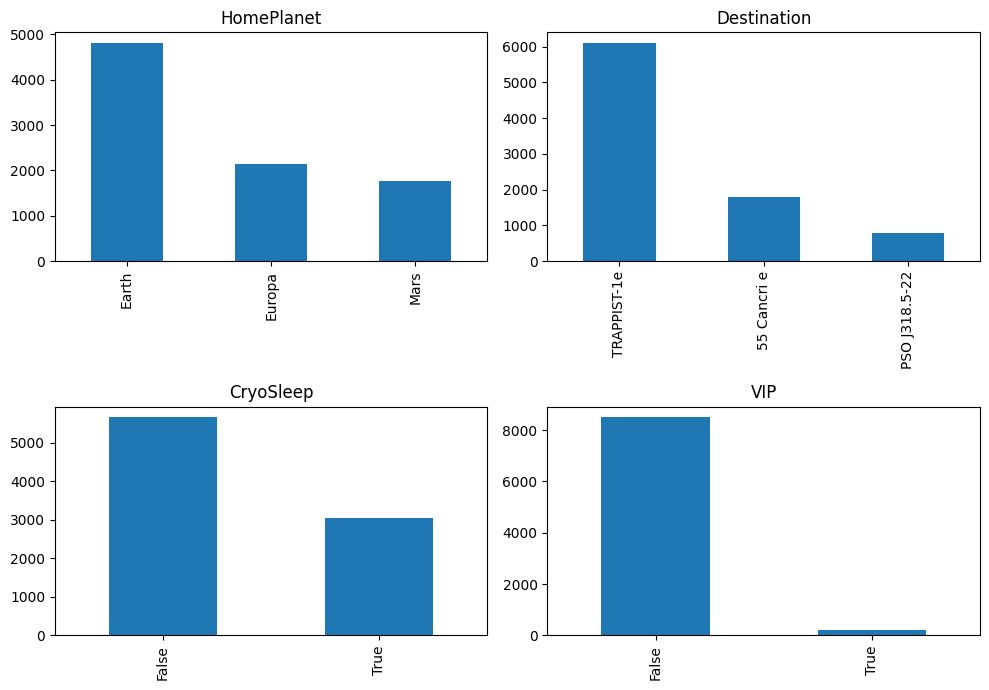

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df['HomePlanet'].value_counts().plot(kind='bar',title='HomePlanet')
plt.subplot(2,2,2)
df['Destination'].value_counts().plot(kind='bar',title='Destination')
plt.subplot(2,2,3)
df['CryoSleep'].value_counts().plot(kind='bar',title='CryoSleep')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout();

In [ ]:
df['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [ ]:
num_var=list(num_var)
num_var.remove('Transported')

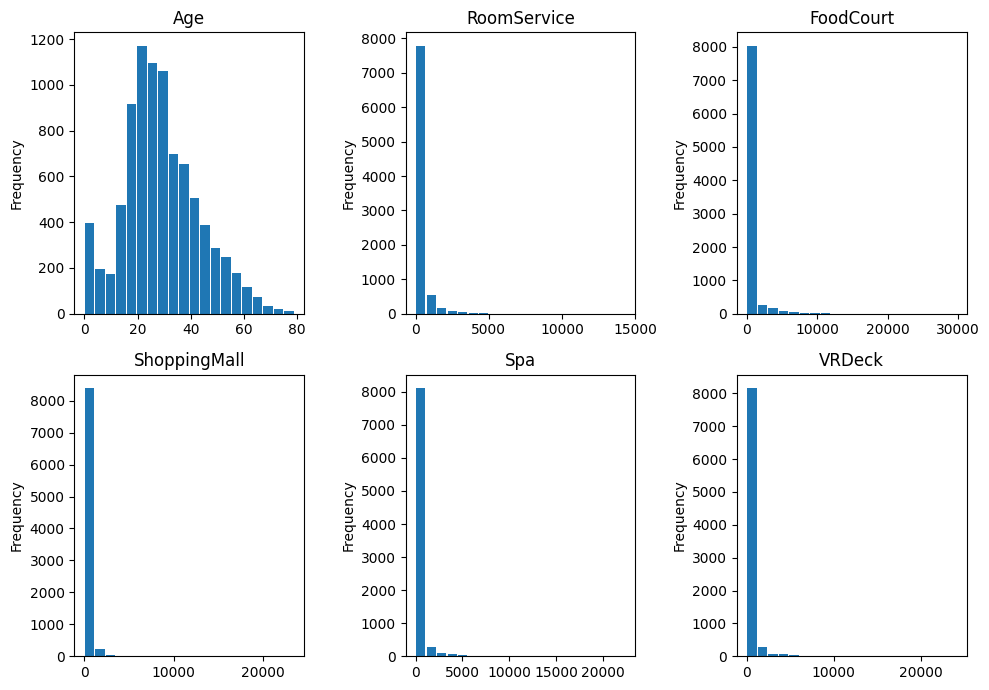

In [ ]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(num_var):
  plt.subplot(2,3,i+1)
  df[num_col].plot(kind='hist',bins=20,rwidth=0.90)
  plt.title(num_col)
plt.tight_layout();


Feature Engineering


In [ ]:
# building the deck and port features from the 'cabin' column
df['Deck']=df['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
df['Port']=df['Cabin'].apply(lambda s:s[-1] if pd.notnull(s) else 'M')
df['Deck']=df['Deck'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}).astype(int)
df['Port']=df['Port'].map({'P':0,'S':1}).astype(int)
df.drop(['Cabin'], axis=1, inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,6,1
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,6,1
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4,1


In [ ]:
#mapping to integers
df['HomePlanet']=df['HomePlanet'].map({'Earth':0,'Europa':1,'Mars':2}).astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,1
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1


In [ ]:
#generating an array of unique destinations by extracting the unique values from the "Destination" column
unique_destination=df['Destination'].unique()
df['Destination']=df['Destination'].map(dict(zip(unique_destination,list(range(len(unique_destination)))))).astype(int)
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0002_01,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,1
2,0003_01,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,0003_02,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0004_01,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,2,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,0
8689,9278_01,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False,6,1
8690,9279_01,0,False,0,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,6,1
8691,9280_01,1,False,2,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4,1


In [ ]:
df['Destination'].unique()

array([0, 1, 2])

In [ ]:
df.drop(['PassengerId'],axis=1,inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,1
2,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1


In [ ]:
unique_vip = df["VIP"].unique()
df["VIP"] = df["VIP"].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,False,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0,False,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,1
2,1,False,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,1,False,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0,False,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1


In [ ]:
unique_cryosleep = df["CryoSleep"].unique()
df["CryoSleep"] = df["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1


In [ ]:
df.to_csv('train_st_cleaned.csv',index=False)

In [ ]:
from google.colab import files
files.download('train_st_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Modelling**

In [ ]:
df_train=pd.read_csv('train_st_cleaned.csv')
X=df_train.drop('Transported',axis=1).values #dropping the transported column and converting dataframe to a NumPy array using the values attribute
y=df_train['Transported'].values # Converting the 'Transported' column to a NumPy array using the values attribute and making it as target variable


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6954, 12), (6954,), (1739, 12), (1739,))

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score=lg.score(X_test,y_test)
print('Score of model',lg_pred_score)
print('Accuracy of model:',lg_pred_score*100,'%')

Score of model 0.7665324899367453
Accuracy of model: 76.65324899367452 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
uploaded=files.upload()
df_test=pd.read_csv('test_st.csv')
df_test.dtypes

num_var=df_test._get_numeric_data().columns
cat_var=df_test.select_dtypes(include=['object']).columns

for num_col in num_var:
  df_test[num_col]=df_test[num_col].fillna(df_test[num_col].mean())

for cat_col in cat_var:
  if cat_col!="Name":
    df_test[cat_col]=df_test[cat_col].fillna(df_test[cat_col].mode()[0])

df_test.drop(['Name'],axis=1,inplace=True)

df_test['Deck']=df_test['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
df_test['Port']=df_test['Cabin'].apply(lambda s:s[-1] if pd.notnull(s) else 'M')
df_test['Deck']=df_test['Deck'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}).astype(int)
df_test['Port']=df_test['Port'].map({'P':0,'S':1}).astype(int)
df_test.drop(['Cabin'], axis=1, inplace=True)

df_test['HomePlanet']=df_test['HomePlanet'].map({'Earth':0,'Europa':1,'Mars':2}).astype(int)

unique_destination=df_test['Destination'].unique()
df_test['Destination']=df_test['Destination'].map(dict(zip(unique_destination,list(range(len(unique_destination)))))).astype(int)
df_test['Destination'].unique()

unique_vip = df_test["VIP"].unique()
df_test["VIP"] = df_test["VIP"].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)
df_test['VIP'].unique()

unique_cryosleep = df_test["CryoSleep"].unique()
df_test["CryoSleep"] = df_test["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)
df_test['CryoSleep'].unique()

df_test.to_csv('test_st_cleaned.csv',index=False)
files.download('test_st_cleaned.csv')


Saving test_st.csv to test_st (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_test_cleaned=pd.read_csv('test_st_cleaned.csv')
df_train_cleaned=pd.read_csv('train_st_cleaned.csv')

In [ ]:
X_train=df_train_cleaned.drop('Transported',axis=1)
y_train=df_train_cleaned['Transported']
X_test=df_test_cleaned.drop('PassengerId',axis=1).copy()

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
predictions=lg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df_submissions = pd.DataFrame({'PassengerId':df_test_cleaned['PassengerId'],'Transported':predictions})
df_submissions.to_csv('submission_st_final.csv',index=False)
files.download('submission_st_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>